<h1><center>A Recommender System for establishing a Fitness Products Store</h1></center>

# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

A commercial fitenss products company wants to open their stores across United States. However, it wants to open it's first store in New York city. The company wants to find a perfect location in New York to open it's first store. To start with positive wibes in expanding their business, the company wants to find a good location to open that store. If the company can open a store near most of the top-rated fitness centers, they can have good business.  For that, the company wants to perform some analysis about the fitness centers located in New York and wants to make a decision based on the conclusions derived from the analysis.


In this project I will try to find an optimal location to open a store for the company. Specifically, this report will be targeted to stakeholders interested in opening a commercial fitness products store in New York, NY.

First, I will try to find the locations where most the fitness centers are located in New York, NY. Later, I will try to filter those locations based on the number of likes given by the customers. If both crieteia are matched, that location is considered as optimal location for open a store. 

I will use my data science capabilities to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Following data sources will be needed to extract/generate the required information:
- number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**


For this Capstone, the Foursquare API is utilized to pull the following location data on Fitness Centers:

- Venue Name
- Venue Location
- Venue Category
- Count of Likes

### Data Acquisition Approach

To acquire the data mentioned above, steps involved in are:

__Step-1:__ Get geolocator lat and long coordinates of New York city   
__Step-2:__ Use Foursquare API to get a list of all venues in New York city  
__Step-3:__ Get venue name, venue ID, location, category, and likes of all venues

# Setting up the Environment 

Install and import our necessary packages for the analysis

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup


print('Libraries are imported.')
print('Notebook is ready for the analysis')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    geopy-1.19.0               |             py_0          53 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.19.0-py_0       conda-forge

The following packages will be UPDATED:

   

# Data Acquisition
## Step-1: Get geolocator latitude and longitude coordinates of New York

In [136]:
address = 'New York, NY'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York, NY are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York, NY are 40.7127281, -74.0060152.


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


## Step-2: Use Foursquare API to get a list of all venues in New York

In [137]:
# Entering in our information into the Foursquare API to access it.
CLIENT_ID = '5I4CX2DSHRKH42AL3ZQCBCYF2JPFLN3WCW5Z1S2HRBDGDJWW' # your Foursquare ID
CLIENT_SECRET = '3VDDIH24LT4YKEU3OM3IMKPA3O5EKLHZHCGIX0QPPWY2KOLE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

# Creating a URL for all of the venues in Hoboken
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

# Pulling the JSON for the URL of venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ce52ede4c1f6753b39e972f'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-57f0689d498e7d49d9189369-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_bar_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1d5941735',
         'name': 'Hotel Bar',
         'pluralName': 'Hotel Bars',
         'primary': True,
         'shortName': 'Hotel Bar'}],
       'id': '57f0689d498e7d49d9189369',
       'location': {'address': '123 Nassau St',
        'cc': 'US',
        'city': 'New York',
        'country': 'United States',
        'distance': 157,
        'formattedAddress': ['123 Nassau St',
         'New York, NY 10038',
         'United States'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.711

## Step-3: Get venue name, venue ID, location, category, and likes of all venues

In [138]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [139]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.formattedAddress']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

#fix the column names so they look relatively normal
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng,formattedAddress
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802,"[123 Nassau St, New York, NY 10038, United Sta..."
1,The Beekman - A Thompson Hotel,56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702,"[123 Nassau St (at Beekman St), New York, NY 1..."
2,City Hall Park,3fd66200f964a520d8f11ee3,Park,40.712241,-74.006977,"[17 Park Row (btwn Broadway & Centre St), New ..."
3,Alba Dry Cleaner & Tailor,4c606c3e1e5cd13ad1a1a1ed,Laundry Service,40.711434,-74.006272,"[140 Nassau St (Beekman and Spruce st), New Yo..."
4,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395,"[11 Barclay St (Broadway), New York, NY 10007,..."
5,Gibney Dance Center Downtown,53373f26498e940581c90985,Dance Studio,40.713923,-74.005661,"[280 Broadway (Chambers St), New York, NY 1000..."
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660,"[5 Beekman St, New York, NY 10038, United States]"
7,The Class by Taryn Toomey,58a253c830ecc66c9e5b40a0,Gym / Fitness Center,40.712753,-74.008734,"[22 Park Pl, New York, NY 10007, United States]"
8,Takahachi Bakery,4c154c9a77cea593c401d260,Bakery,40.713653,-74.008804,"[25 Murray St (at Church St), New York, NY 100..."
9,Aahar Indian Cuisine,575dea4c498e2739e43a27e2,Indian Restaurant,40.713307,-74.007994,"[10 Murray St (Broadway), New York, NY 10007, ..."



## Methodology <a name="methodology"></a>


__Step-1:__ Get venue name, venue ID, location, category, and likes of all venues in New York city  
__Step-2:__ Group the venues into 2-3 clusters based on number of likes      
__Step-3:__ Draw the conclusions based on the characteristics of clustered data  
__Step-4:__ Make suggestions based on the conclusions drawn 

## Analysis <a name="analysis"></a>
## Step-1: Find the unique venues and extract the venues related to fitness

In [140]:
# find a list of unique categories from the API so we can see what may or may not fit for restaurants
nearby_venues['categories'].unique()

array(['Hotel Bar', 'Hotel', 'Park', 'Laundry Service', 'Coffee Shop',
       'Dance Studio', 'French Restaurant', 'Gym / Fitness Center',
       'Bakery', 'Indian Restaurant', 'Falafel Restaurant', 'Gym',
       'Sandwich Place', 'Yoga Studio', 'Monument / Landmark',
       'American Restaurant', 'Boxing Gym', 'Cuban Restaurant',
       'Sporting Goods Shop', 'Building', 'Liquor Store', 'Pizza Place',
       'Bar', 'Plaza', 'Event Space', 'Burger Joint',
       'Furniture / Home Store', 'Italian Restaurant', 'Spa',
       'Middle Eastern Restaurant', 'Antique Shop', 'Fast Food Restaurant',
       'Burrito Place', 'Juice Bar', 'Cosmetics Shop', 'Art Gallery',
       "Women's Store", 'Strip Club', 'Japanese Restaurant', 'Speakeasy',
       'Baby Store', 'Bookstore', 'Wine Bar', 'Restaurant',
       'Coworking Space', 'Health & Beauty Service', 'Café',
       'Discount Store', 'Greek Restaurant', 'Cocktail Bar', 'Nail Salon',
       'Poke Place', 'Kids Store', 'Molecular Gastronomy Resta

In [141]:
# Manual creation of a list of categorie to remove from our dataframe because they are not fitness centers

removal_list = ['Gym / Fitness Center', 'Gym', 'Yoga Studio', 'Boxing Gym', 'Health & Beauty Service', 'Spa']

nearby_venues2 = nearby_venues.copy()


#getting a clear dataframe of just fitness centers
nearby_venues2 = nearby_venues2[nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng,formattedAddress
7,The Class by Taryn Toomey,58a253c830ecc66c9e5b40a0,Gym / Fitness Center,40.712753,-74.008734,"[22 Park Pl, New York, NY 10007, United States]"
11,CrossFit 212 TriBeCa,52001eed498e9ac16ca5e20b,Gym,40.714537,-74.005999,"[281 Broadway, New York, NY 10007, United States]"
15,Kula Yoga Project,4ad79413f964a520610c21e3,Yoga Studio,40.714342,-74.008094,"[28 Warren St (Church St), New York, NY 10007,..."
20,Church Street Boxing Gym,4b8dbba4f964a5201e0b33e3,Boxing Gym,40.713354,-74.009067,"[25 Park Pl (btwn Church St. & Broadway), New ..."
32,Equinox Tribeca,4a6e331af964a52031d41fe3,Gym,40.714099,-74.009686,"[54 Murray Street (at W Broadway), New York, N..."
35,Bikram Yoga Downtown,4b1c5a2ff964a520720624e3,Yoga Studio,40.710021,-74.007224,"[121 Fulton St Fl 3 (Dutch), New York, NY 1003..."
39,Heyday,57ad129c498e05b086594d72,Spa,40.715598,-74.007882,"[92 Reade St, New York, NY 10013, United States]"
44,Exceed Physical Culture,53910ac3498e57a5dc0eb160,Gym / Fitness Center,40.715629,-74.007992,"[97 Reade St (bet W Broadway & Church St), New..."
64,European Wax Center,5400b87a498e87c5ae6e5143,Health & Beauty Service,40.714710,-74.007448,"[95 Chambers St, New York, NY 10007, United St..."
73,Wall Street Bath & Spa 88,49ba7becf964a5206e531fe3,Spa,40.709278,-74.005690,"[88 Fulton St, New York, NY 10038, United States]"


## Step-2: Find the nuber of likes given to each fitness center and add that info to original data frame

In [142]:
#let's get a list of venues
venue_id_list = nearby_venues2['id'].tolist()



#set up to pull the likes from the API based on venue ID
url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[17, 14, 48, 67, 246, 22, 28, 91, 7, 70, 13]


In [143]:
#let's make a copy of our initial dataframe just in case anything goes wrong
fitness_centers = nearby_venues2.copy()


# add in the list of likes
fitness_centers['total likes'] = like_list
fitness_centers

,name,id,categories,lat,lng,formattedAddress,total likes
7,The Class by Taryn Toomey,58a253c830ecc66c9e5b40a0,Gym / Fitness Center,40.712753,-74.008734,"[22 Park Pl, New York, NY 10007, United States]",17
11,CrossFit 212 TriBeCa,52001eed498e9ac16ca5e20b,Gym,40.714537,-74.005999,"[281 Broadway, New York, NY 10007, United States]",14
15,Kula Yoga Project,4ad79413f964a520610c21e3,Yoga Studio,40.714342,-74.008094,"[28 Warren St (Church St), New York, NY 10007,...",48
20,Church Street Boxing Gym,4b8dbba4f964a5201e0b33e3,Boxing Gym,40.713354,-74.009067,"[25 Park Pl (btwn Church St. & Broadway), New ...",67
32,Equinox Tribeca,4a6e331af964a52031d41fe3,Gym,40.714099,-74.009686,"[54 Murray Street (at W Broadway), New York, N...",246
35,Bikram Yoga Downtown,4b1c5a2ff964a520720624e3,Yoga Studio,40.710021,-74.007224,"[121 Fulton St Fl 3 (Dutch), New York, NY 1003...",22
39,Heyday,57ad129c498e05b086594d72,Spa,40.715598,-74.007882,"[92 Reade St, New York, NY 10013, United States]",28
44,Exceed Physical Culture,53910ac3498e57a5dc0eb160,Gym / Fitness Center,40.715629,-74.007992,"[97 Reade St (bet W Broadway & Church St), New...",91
64,European Wax Center,5400b87a498e87c5ae6e5143,Health & Beauty Service,40.714710,-74.007448,"[95 Chambers St, New York, NY 10007, United St...",7
73,Wall Street Bath & Spa 88,49ba7becf964a5206e531fe3,Spa,40.709278,-74.005690,"[88 Fulton St, New York, NY 10038, United States]",70


## Step-3: Group the data into discrete groups based on number of likes 

Maximum number of likes:  246
Minimum number of likes:  7
Median of number of likes:  28.0
Mean of number of likes:  56.63636363636363


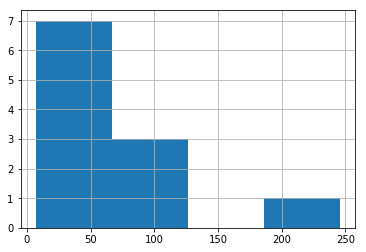

In [144]:
# now let's bin total likes
print('Maximum number of likes: ', fitness_centers['total likes'].max())
print('Minimum number of likes: ', fitness_centers['total likes'].min())
print('Median of number of likes: ', fitness_centers['total likes'].median())
print('Mean of number of likes: ', fitness_centers['total likes'].mean())

# let's visualize our total likes based on a histogram
import matplotlib.pyplot as plt
fitness_centers['total likes'].hist(bins=4)
plt.show()

In [145]:
# what are the bins we want to use?
print('25th percentile of the number of likes: ', np.percentile(fitness_centers['total likes'], 25))
print('50th percentile of the number of likes: ', np.percentile(fitness_centers['total likes'], 50))
print('75th percentile of the number of likes: ', np.percentile(fitness_centers['total likes'], 75))

25th percentile of the number of likes:  15.5
50th percentile of the number of likes:  28.0
75th percentile of the number of likes:  68.5


In [146]:
# now we have our bin values so let's set them to the appropriate values
# less than 15, 16-28, 29-69, >70
# poor, below_avg, abv_avg, great

poor = fitness_centers['total likes']<=15
below_avg = fitness_centers[(fitness_centers['total likes']>15) & (fitness_centers['total likes']<=28)]
abv_avg = fitness_centers[(fitness_centers['total likes']>28) & (fitness_centers['total likes']<=69)]
great = fitness_centers['total likes']>69

In [147]:
# let's set up a function that will re-categorize fitness centers based on likes

def conditions(s):
    if s['total likes']<=15:
        return 'poor'
    if s['total likes']<=28:
        return 'below avg'
    if s['total likes']<=69:
        return 'above avg'
    if s['total likes']>69:
        return 'great'

fitness_centers['total likes_cat']=fitness_centers.apply(conditions, axis=1)
fitness_centers

,name,id,categories,lat,lng,formattedAddress,total likes,total likes_cat
7,The Class by Taryn Toomey,58a253c830ecc66c9e5b40a0,Gym / Fitness Center,40.712753,-74.008734,"[22 Park Pl, New York, NY 10007, United States]",17,below avg
11,CrossFit 212 TriBeCa,52001eed498e9ac16ca5e20b,Gym,40.714537,-74.005999,"[281 Broadway, New York, NY 10007, United States]",14,poor
15,Kula Yoga Project,4ad79413f964a520610c21e3,Yoga Studio,40.714342,-74.008094,"[28 Warren St (Church St), New York, NY 10007,...",48,above avg
20,Church Street Boxing Gym,4b8dbba4f964a5201e0b33e3,Boxing Gym,40.713354,-74.009067,"[25 Park Pl (btwn Church St. & Broadway), New ...",67,above avg
32,Equinox Tribeca,4a6e331af964a52031d41fe3,Gym,40.714099,-74.009686,"[54 Murray Street (at W Broadway), New York, N...",246,great
35,Bikram Yoga Downtown,4b1c5a2ff964a520720624e3,Yoga Studio,40.710021,-74.007224,"[121 Fulton St Fl 3 (Dutch), New York, NY 1003...",22,below avg
39,Heyday,57ad129c498e05b086594d72,Spa,40.715598,-74.007882,"[92 Reade St, New York, NY 10013, United States]",28,below avg
44,Exceed Physical Culture,53910ac3498e57a5dc0eb160,Gym / Fitness Center,40.715629,-74.007992,"[97 Reade St (bet W Broadway & Church St), New...",91,great
64,European Wax Center,5400b87a498e87c5ae6e5143,Health & Beauty Service,40.714710,-74.007448,"[95 Chambers St, New York, NY 10007, United St...",7,poor
73,Wall Street Bath & Spa 88,49ba7becf964a5206e531fe3,Spa,40.709278,-74.005690,"[88 Fulton St, New York, NY 10038, United States]",70,great


## Step-4: Create dummy variables for total likes and categories 

In [148]:
# one hot encoding
fitness_centers_onehot = pd.get_dummies(fitness_centers[['categories', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
fitness_centers_onehot['Name'] = fitness_centers['name'] 

# move neighborhood column to the first column
fixed_columns = [fitness_centers_onehot.columns[-1]] + list(fitness_centers_onehot.columns[:-1])
fitness_centers_onehot = fitness_centers_onehot[fixed_columns]

fitness_centers_onehot

,Name,Boxing Gym,Gym,Gym / Fitness Center,Health & Beauty Service,Spa,Yoga Studio,above avg,below avg,great,poor
7,The Class by Taryn Toomey,0,0,1,0,0,0,0,1,0,0
11,CrossFit 212 TriBeCa,0,1,0,0,0,0,0,0,0,1
15,Kula Yoga Project,0,0,0,0,0,1,1,0,0,0
20,Church Street Boxing Gym,1,0,0,0,0,0,1,0,0,0
32,Equinox Tribeca,0,1,0,0,0,0,0,0,1,0
35,Bikram Yoga Downtown,0,0,0,0,0,1,0,1,0,0
39,Heyday,0,0,0,0,1,0,0,1,0,0
44,Exceed Physical Culture,0,0,1,0,0,0,0,0,1,0
64,European Wax Center,0,0,0,1,0,0,0,0,0,1
73,Wall Street Bath & Spa 88,0,0,0,0,1,0,0,0,1,0


## Step-5:  Perform Clustering 

In [155]:
# Now let's run our k-means clustering algo to get our labels
cluster_df = fitness_centers_onehot.drop('Name', axis=1)

k_clusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# Let's add our cluster labels back into our original dataframe
fitness_centers['label'] = kmeans.labels_
fitness_centers

,name,id,categories,lat,lng,formattedAddress,total likes,total likes_cat,label
7,The Class by Taryn Toomey,58a253c830ecc66c9e5b40a0,Gym / Fitness Center,40.712753,-74.008734,"[22 Park Pl, New York, NY 10007, United States]",17,below avg,0
11,CrossFit 212 TriBeCa,52001eed498e9ac16ca5e20b,Gym,40.714537,-74.005999,"[281 Broadway, New York, NY 10007, United States]",14,poor,2
15,Kula Yoga Project,4ad79413f964a520610c21e3,Yoga Studio,40.714342,-74.008094,"[28 Warren St (Church St), New York, NY 10007,...",48,above avg,0
20,Church Street Boxing Gym,4b8dbba4f964a5201e0b33e3,Boxing Gym,40.713354,-74.009067,"[25 Park Pl (btwn Church St. & Broadway), New ...",67,above avg,0
32,Equinox Tribeca,4a6e331af964a52031d41fe3,Gym,40.714099,-74.009686,"[54 Murray Street (at W Broadway), New York, N...",246,great,1
35,Bikram Yoga Downtown,4b1c5a2ff964a520720624e3,Yoga Studio,40.710021,-74.007224,"[121 Fulton St Fl 3 (Dutch), New York, NY 1003...",22,below avg,0
39,Heyday,57ad129c498e05b086594d72,Spa,40.715598,-74.007882,"[92 Reade St, New York, NY 10013, United States]",28,below avg,0
44,Exceed Physical Culture,53910ac3498e57a5dc0eb160,Gym / Fitness Center,40.715629,-74.007992,"[97 Reade St (bet W Broadway & Church St), New...",91,great,1
64,European Wax Center,5400b87a498e87c5ae6e5143,Health & Beauty Service,40.714710,-74.007448,"[95 Chambers St, New York, NY 10007, United St...",7,poor,2
73,Wall Street Bath & Spa 88,49ba7becf964a5206e531fe3,Spa,40.709278,-74.005690,"[88 Fulton St, New York, NY 10038, United States]",70,great,1


## Step-6:  Visualize the Clustering results 

In [151]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(fitness_centers['lat'], fitness_centers['lng'], fitness_centers['name'], fitness_centers['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results <a name="results"></a>
 

## Cluster 1

In [152]:
fitness_centers.loc[fitness_centers['label']==0]

,name,id,categories,lat,lng,formattedAddress,total likes,total likes_cat,label
7,The Class by Taryn Toomey,58a253c830ecc66c9e5b40a0,Gym / Fitness Center,40.712753,-74.008734,"[22 Park Pl, New York, NY 10007, United States]",17,below avg,0
15,Kula Yoga Project,4ad79413f964a520610c21e3,Yoga Studio,40.714342,-74.008094,"[28 Warren St (Church St), New York, NY 10007,...",48,above avg,0
20,Church Street Boxing Gym,4b8dbba4f964a5201e0b33e3,Boxing Gym,40.713354,-74.009067,"[25 Park Pl (btwn Church St. & Broadway), New ...",67,above avg,0
35,Bikram Yoga Downtown,4b1c5a2ff964a520720624e3,Yoga Studio,40.710021,-74.007224,"[121 Fulton St Fl 3 (Dutch), New York, NY 1003...",22,below avg,0
39,Heyday,57ad129c498e05b086594d72,Spa,40.715598,-74.007882,"[92 Reade St, New York, NY 10013, United States]",28,below avg,0


## Cluster 2

In [153]:
fitness_centers.loc[fitness_centers['label']==1]

,name,id,categories,lat,lng,formattedAddress,total likes,total likes_cat,label
32,Equinox Tribeca,4a6e331af964a52031d41fe3,Gym,40.714099,-74.009686,"[54 Murray Street (at W Broadway), New York, N...",246,great,1
44,Exceed Physical Culture,53910ac3498e57a5dc0eb160,Gym / Fitness Center,40.715629,-74.007992,"[97 Reade St (bet W Broadway & Church St), New...",91,great,1
73,Wall Street Bath & Spa 88,49ba7becf964a5206e531fe3,Spa,40.709278,-74.005690,"[88 Fulton St, New York, NY 10038, United States]",70,great,1


## Cluster 3

In [154]:
fitness_centers.loc[fitness_centers['label']==2]

,name,id,categories,lat,lng,formattedAddress,total likes,total likes_cat,label
11,CrossFit 212 TriBeCa,52001eed498e9ac16ca5e20b,Gym,40.714537,-74.005999,"[281 Broadway, New York, NY 10007, United States]",14,poor,2
64,European Wax Center,5400b87a498e87c5ae6e5143,Health & Beauty Service,40.714710,-74.007448,"[95 Chambers St, New York, NY 10007, United St...",7,poor,2
98,New York by Gehry Gym,4e9b03e59a52edbd658ca490,Gym,40.710655,-74.005709,"[8 Spruce St., New York, NY 10038, United States]",13,poor,2


# Discussions

The following observations have made from the results obtained from the cluster analysis on the dta pulled from Foursquare.

### Observations made from data in Cluster - 1
- Most of the Fitness centers are located near Park Place
- All the fitness centers are rated as below and above average clusters


### Observations made from data in Cluster - 2
- Most of the Fitness centers located near W Broadway
- All the fitness centers are rated as great


### Observations made from data in Cluster - 3

- All the fitness centers are rated as poor

After the careful analysis of the geographic locations and number of likes given by the users using clustering approach, some interesting observations have been made from the results. There are more chances to those fitness centers having good rating to attract new customers as the reviews given by the existing customers are good. The new customers also need some fitness accessories and equipment eventually. 

## Conclusion <a name="conclusion"></a>

This project is aimed to find a optimal location to establish a commercial fitness products store in New York, NY. Data about the fitness centers present in New York city is gathered from Foursquare website using Foursquare API. Then the data is processed to drop the unwanted venues such as malls, restaurants, Pizza shops, Ice Cream shops etc. All the type of venues related to fitness like gyms, fitness centers, spa etc. are rendered and analysed. Then, data is grouped into four bins based on the number of likes. Later, Clustering of that data is performed to divide the data into groups. After clustering we have identified the common traits in the clusters and observed cluster specific information. Based on the observations I have made some conclusions. The company will make a decision where to open a store. 